# **Hola!** 🦠🦠
 Corriendo celda por celda (con Ctrl+Enter o Cmd si es Mac) puedes generar imágenes y videos de interpolación explorando el espacio latente de los modelos de StyleGan. Las imágenes y videos que generes quedarán en una carpeta de tu Drive anotadas en el nombre con la semilla del generador de números aleatorios o 'seed'.

--Antes de empezar hay que agregar el shortcut de la carpeta a los modelos compartida por Emma a tu drive para que puedas cargarlas más adelante. 

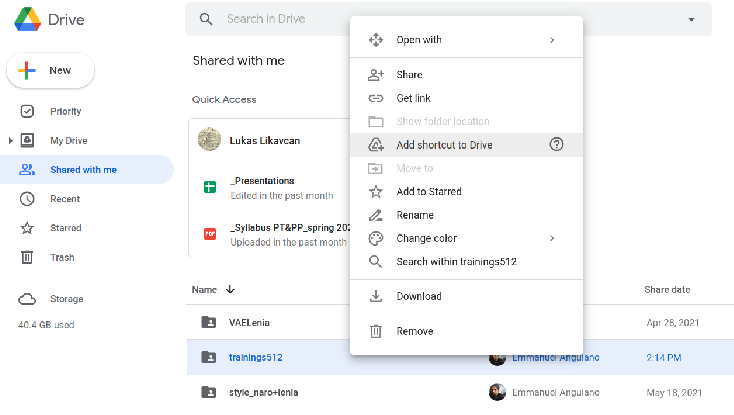

Luego, genera una copia de esta notebook en tu propio drive para guardar tus cambios.

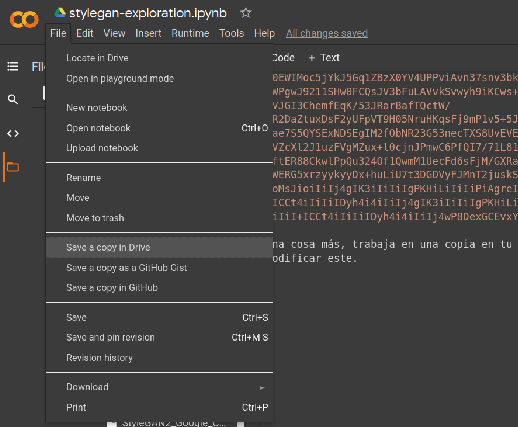

Una cosa más, asegurate de que la notebook esté usando un runtime con GPU de esta forma: 

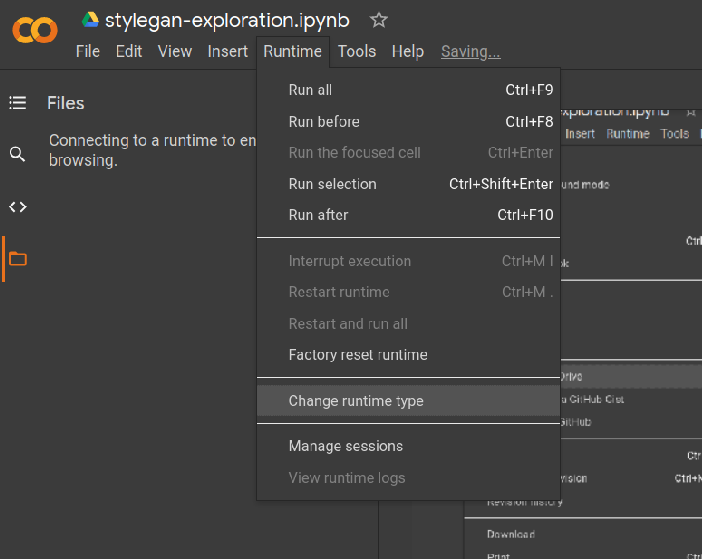

#Training StyleGAN2 on Colab
Y’all won’t stop asking me about this so here ya go 😂

If it were me I’d sign up for Colab Pro ($10/month) to get a couple extra hours of training time in per session. But you crazy kids can do whatever you want.

## OJO 👀 'Mount' Google Drive
 Este paso requiere de que confirmes el acceso de Colab a tu Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Install the repo
**Only do this for the first time ever setting this up!**

If this is your first time ever running this notebook, you’ll want to install my fork of StyleGAN2 to your Drive account. Make sure you have ample space on your Drive. This will install the repo and add some dependecies (like transferring from FFHQ the first time).

Every time after your first use of this notebook you’ll want to skip this cell and run the cell after this.

In [ ]:
#SKIP this if you already have a stylegan2 folder in your google drive
%cd /content/drive/My\ Drive/
!mkdir stylegan2-colab
%cd stylegan2-colab/
!git clone https://github.com/dvschultz/stylegan2
%cd stylegan2
!mkdir pkl
%cd pkl
!gdown --id 1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF #inception: https://drive.google.com/open?id=1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF
%cd ../
!mkdir results
!mkdir results/00001-pretrained
%cd results/00001-pretrained
!gdown --id 1UlDmJVLLnBD9SnLSMXeiZRO6g-OMQCA_
!mv stylegan2-ffhq-config-f.pkl network-snapshot-10000.pkl
%cd ../../
%mkdir datasets

/content/drive/My Drive
/content/drive/My Drive/stylegan2-colab
Cloning into 'stylegan2'...
remote: Enumerating objects: 552, done.
remote: Total 552 (delta 0), reused 0 (delta 0), pack-reused 552
Receiving objects: 100% (552/552), 22.47 MiB | 18.32 MiB/s, done.
Resolving deltas: 100% (285/285), done.
/content/drive/My Drive/stylegan2-colab/stylegan2
/content/drive/My Drive/stylegan2-colab/stylegan2/pkl
Downloading...
From: https://drive.google.com/uc?id=1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF
To: /content/drive/My Drive/stylegan2-colab/stylegan2/pkl/inception_v3_features.pkl
87.3MB [00:01, 44.3MB/s]
/content/drive/My Drive/stylegan2-colab/stylegan2
/content/drive/My Drive/stylegan2-colab/stylegan2/results/00001-pretrained
Downloading...
From: https://drive.google.com/uc?id=1UlDmJVLLnBD9SnLSMXeiZRO6g-OMQCA_
To: /content/drive/My Drive/stylegan2-colab/stylegan2/results/00001-pretrained/stylegan2-ffhq-config-f.pkl
382MB [00:05, 75.2MB/s]
/content/drive/My Drive/stylegan2-colab/stylegan2


##Picking up from a previous session
If you already have the StyleGAN2 repo installed in Drive skip the above cell and run the following. This will make sure you have the latest version in case I make updates.

In [ ]:
#USE this if you already have a stylegan2 folder in google drive
%cd /content/drive/My\ Drive/stylegan2-colab/stylegan2
!git pull

/content/drive/My Drive/stylegan2-colab/stylegan2
Already up to date.


##Make sure Tensorflow 1.15 is set
Colab now defaults to Tensorflow 2. Make sure you run this cell to reset it to TF1.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#Testing the model (generating images)
The following command will generate 55 sample images from the model.

##Options
`--network`

Make sure the `--network` argument points to your .pkl file. (My preferred method is to right click on the file in the Files pane to your left and choose `Copy Path`, then paste that into the argument after the `=` sign).

`--seeds`

This allows you to choose random seeds from the model. Remember that our input to StyleGAN is a 512-dimensional array. These seeds will generate those 512 values. Each seed will generate a different, random array. The same seed value will also always generate the same random array, so we can later use it for other purposes like interpolation.

`--truncation-psi`

Truncation is a special argument of StyleGAN. Essentially values that are closer to 0 will be more real than numbers further away from 0. I generally recommend a value between `0.5` and `1.0`. `0.5` will give you pretty "realistic" results, while `1.0` is likely to give you "weirder" results.

In [ ]:
!pip install opensimplex

# COMENTARIO 🐛
A partir de aquí empieza lo bueno, es posible que los nombres de las direcciones a los archivos cambie, puedes usar el navegador de archivos en la barra de la izquierda y hacer 'Copy path' si quieres apuntar a un archivo en específico.

Este es un ejemplo para la dirección el archivo de la red en la siguiente celda:

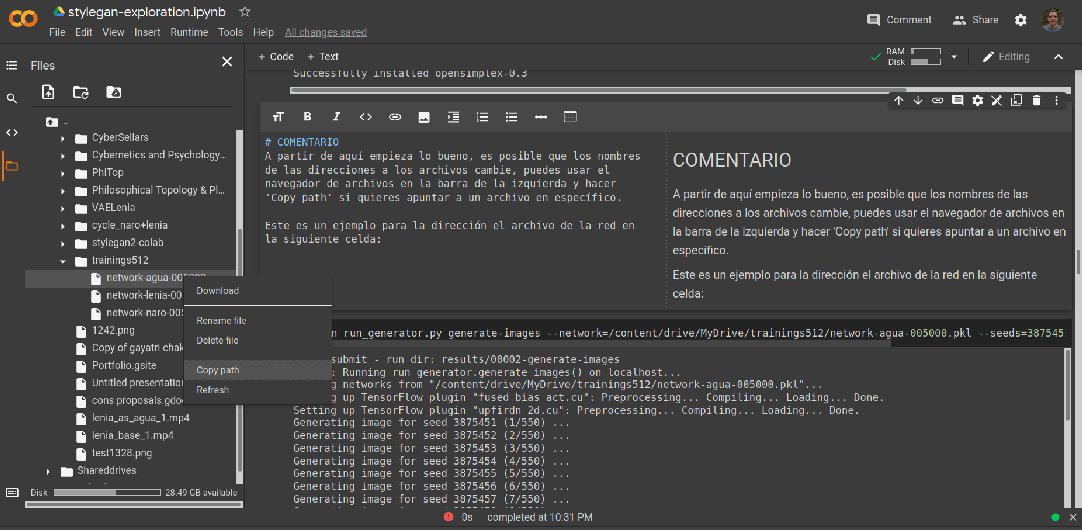


Por último, los valores del parámetro --seeds=a-b* (1-100 en este caso) en la celda siguiente indica al generador crear las imágenes correspondientes a cada seed en el rango entre a y b (1, 2, 3, ..., 99, 100 en este caso).

In [ ]:
!python run_generator.py generate-images --network=/content/drive/MyDrive/trainings512/network-agua-005000.pkl --seeds=1-100 --truncation-psi=0.7

Local submit - run_dir: results/00002-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "/content/drive/MyDrive/trainings512/network-agua-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Generating image for seed 3875451 (1/550) ...
Generating image for seed 3875452 (2/550) ...
Generating image for seed 3875453 (3/550) ...
Generating image for seed 3875454 (4/550) ...
Generating image for seed 3875455 (5/550) ...
Generating image for seed 3875456 (6/550) ...
Generating image for seed 3875457 (7/550) ...
Generating image for seed 3875458 (8/550) ...
Generating image for seed 3875459 (9/550) ...
Generating image for seed 3875460 (10/550) ...
Generating image for seed 3875461 (11/550) ...
Generating image for seed 3875462 (12/550) ...
Generating image for seed 3875463 (13/550) ...
Gen

Esta celda la puedes des-comentar si quieres hacer un zip de las imágenes generadas

In [ ]:
# !zip -r generated-0.7.zip /content/stylegan2/results/00000-generate-images

  adding: content/stylegan2/results/00000-generate-images/ (stored 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0025.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0014.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0007.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0018.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0017.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0010.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0015.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0024.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0021.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/seed0004.png (deflated 0%)
  adding: content/stylegan2/results/00000-generate-images/log.txt (deflated 74%

##Interpolation


In [ ]:
!python run_generator.py generate-latent-walk --network=/content/drive/MyDrive/trainings512/network-agua-005000.pkl --seeds=3,11,17,25,3 --frames 480 --truncation-psi=0.7

Local submit - run_dir: results/00003-generate-latent-walk
dnnlib: Running run_generator.generate_latent_walk() on localhost...
Loading networks from "/content/drive/MyDrive/trainings512/network-agua-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
not enough values to generate walk
Generating image for step 0/204 ...
Generating image for step 1/204 ...
Generating image for step 2/204 ...
Generating image for step 3/204 ...
Generating image for step 4/204 ...
Generating image for step 5/204 ...
Generating image for step 6/204 ...
Generating image for step 7/204 ...
Generating image for step 8/204 ...
Generating image for step 9/204 ...
Generating image for step 10/204 ...
Generating image for step 11/204 ...
Generating image for step 12/204 ...
Generating image for step 13/204 ...
Generating image for step 14/204 ...
Generating image for step 15/204 ...
Gene

In [ ]:
!ls

datasets		results
dataset_tool.py		run_generator.py
dnnlib			run_metrics.py
Dockerfile		run_projector.py
docs			run_training.py
easy-install.sh		runway_model.py
LICENSE.txt		runway.yml
metrics			StyleGAN2_Google_Colab_Example.ipynb
pkl			StyleGAN2_projection_interpolation.ipynb
pretrained_networks.py	StyleGAN2_Projection.ipynb
projector.py		test_nvcc.cu
__pycache__		training
README.md		USAGE.md
requirements.txt


In [ ]:
#convert to video 
!ffmpeg -r 24 -i results/00003-generate-latent-walk/frame%05d.png -vcodec libx264 -pix_fmt yuv420p latent-walk-v2.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
# rm -r /content/drive/My Drive/stylegan2-colab-test/stylegan2/results/00002-stylegan2-birdaus-1gpu-config-f

rm: cannot remove '/content/drive/My': No such file or directory
rm: cannot remove 'Drive/stylegan2-colab-test/stylegan2/results/00002-stylegan2-birdaus-1gpu-config-f': No such file or directory
